In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob
import os

colors = pd.read_csv('data/team_colors.csv')

champs_glob = glob.glob(os.path.join('data/champs', "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in champs_glob)
all_champs   = pd.concat(df_from_each_file, ignore_index=True)

data = colors.merge(all_champs, how = "right", on = ["Team", "League"])

In [17]:
winners = data[data["Wins"] > 0]
winners.head()

,Team,hex_Primary_Color,hex_Secondary_Color,League,wc_css2_Primary_Name,wc_css2_Secondary_Name,wc_css3_Primary_Name,wc_css3_Secondary_Name,wa_Primary_Names,wa_Secondary_Names,wa_Primary_Name_1,wa_Primary_Name_2,wa_Secondary_Name_1,wa_Secondary_Name_2,Wins
2,Baltimore Ravens,#241773,#000000,NFL,navy,black,midnightblue,black,"midnight blue,navy","black,dim gray",midnight blue,navy,black,dim gray,2
5,Chicago Bears,#0B162A,#C83803,NFL,black,red,black,firebrick,"midnight blue,steel blue","orange red,chocolate",midnight blue,steel blue,orange red,chocolate,1
8,Dallas Cowboys,#041E42,#869397,NFL,navy,gray,midnightblue,lightslategray,"navy,dark blue","light slate gray,slate gray",navy,dark blue,light slate gray,slate gray,5
9,Denver Broncos,#002244,#FB4F14,NFL,navy,red,midnightblue,orangered,"navy,teal","orange red,chocolate",navy,teal,orange red,chocolate,3
11,Green Bay Packers,#203731,#FFB612,NFL,black,orange,darkslategray,orange,"dark slate gray,cadet blue","orange,dark orange",dark slate gray,cadet blue,orange,dark orange,4


For plotting, let's create dictionaries that map each named color to their hex value. This will make plotting much easier in the future. We can functionalize this:

In [44]:
def make_color_dict(color_name_header):
    if "Primary" in color_name_header: 
        colors = "hex_Primary_Color"
    else:
        colors = "hex_Secondary_Color"
        
    color_dict = pd.Series(winners[colors].values, index = winners[color_name_header]).to_dict()
    return color_dict
    
webcolors_css2_p = make_color_dict("wc_css2_Primary_Name")
webcolors_css2_s = make_color_dict("wc_css2_Secondary_Name")
webcolors_css3_p = make_color_dict("wc_css3_Primary_Name")
webcolors_css3_s = make_color_dict("wc_css3_Secondary_Name")

wolfram_p_1 = make_color_dict("wa_Primary_Name_1")
wolfram_p_2 = make_color_dict("wa_Primary_Name_2")
wolfram_s_1 = make_color_dict("wa_Secondary_Name_1")
wolfram_s_2 = make_color_dict("wa_Secondary_Name_2")

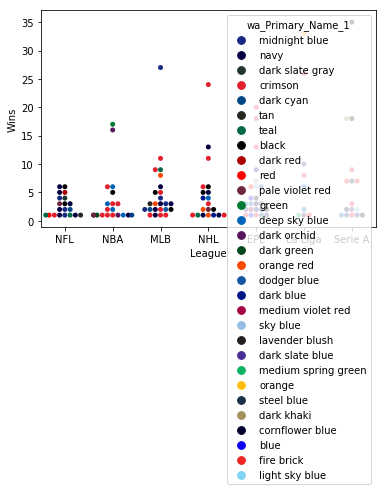

In [48]:
# need to sum wins by color
sns.swarmplot(x="League", y="Wins", data=winners, 
              hue="wa_Primary_Name_1" , palette=wolfram_p_1)

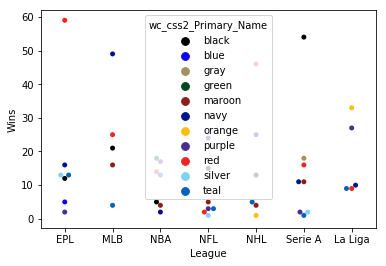

In [59]:
sns.swarmplot(data = winners.groupby(["wc_css2_Primary_Name", "League"])["Wins"].sum().reset_index(),
              x="League", y="Wins",
              hue="wc_css2_Primary_Name", 
              palette=webcolors_css2_p)

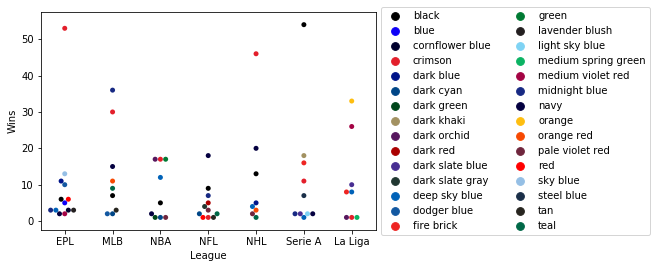

In [102]:
g = sns.swarmplot(data = winners.groupby(["wa_Primary_Name_1", "League"])["Wins"].sum().reset_index(),
              x="League", y="Wins",
              hue="wa_Primary_Name_1", 
              palette=wolfram_p_1)

g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)

# TOP 20 PRIMARY COLORS PLOT

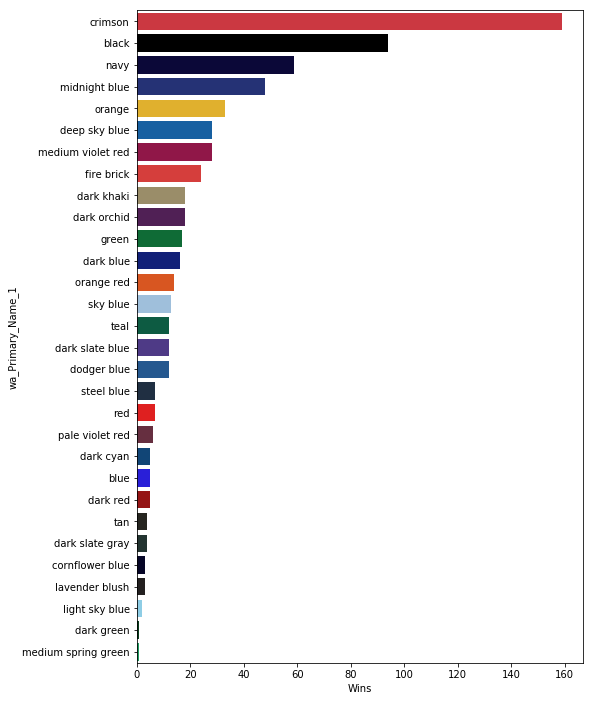

In [81]:
plt.figure(figsize=(8,12))
g = sns.barplot(data = winners.groupby(["wa_Primary_Name_1"])["Wins"].
                       sum().
                       reset_index().
                       sort_values(by = ["Wins"], ascending=False),
                x = "Wins", y = "wa_Primary_Name_1",
                hue = "wa_Primary_Name_1", palette = wolfram_p_1, dodge=False)
g.legend_.remove()

# TOP 20 SECONDARY COLORS

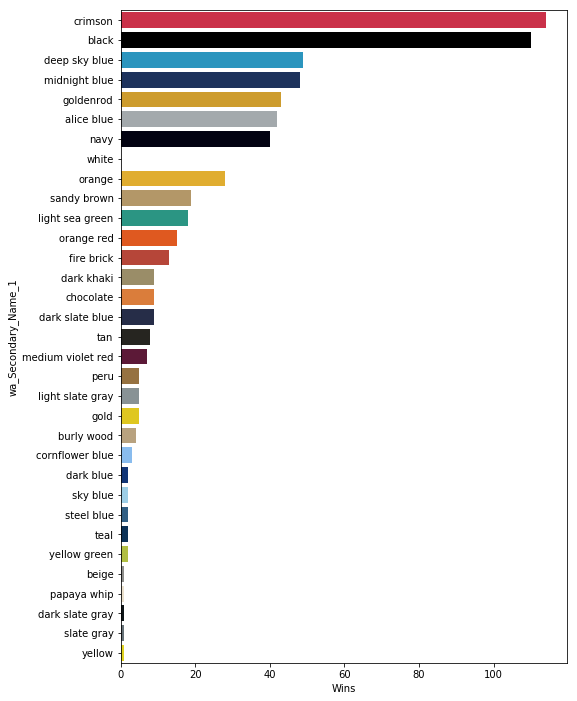

In [82]:
plt.figure(figsize=(8,12))
g = sns.barplot(data = winners.groupby(["wa_Secondary_Name_1"])["Wins"].
                       sum().
                       reset_index().
                       sort_values(by = ["Wins"], ascending=False),
                x = "Wins", y = "wa_Secondary_Name_1",
                hue = "wa_Secondary_Name_1", palette = wolfram_s_1, dodge=False)
g.legend_.remove()

# Get Frequency and plot

# Pie Chart (scrap)

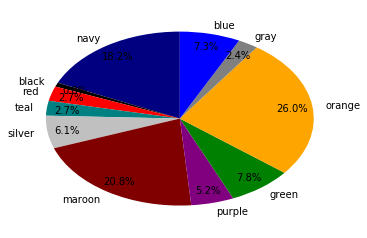

In [120]:
fig1, ax1 = plt.subplots()
 
ax1 = plt.pie(data=winners.groupby(["wc_css2_Primary_Name"])["Wins"].sum().reset_index(),
             x = "Wins", 
             colors=webcolors_css2_p, 
             labels=webcolors_css2_p, 
             startangle=90.0, 
             autopct='%1.1f%%', 
              pctdistance=0.85)